In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [2]:
df1=pd.read_csv("24B056.csv")
df2=pd.read_csv("24B057.csv")
df3=pd.read_csv("24B058.csv")
df4=pd.read_csv("24B059.csv")
df5=pd.read_csv("24B060.csv")
df6=pd.read_csv("24B061.csv")
pd.set_option('display.max_columns', 100)


In [38]:

df1= df1.drop(columns= "Time Zone")
df2= df2.drop(columns= "Time Zone")
df3= df3.drop(columns= "Time Zone")
#df4= df4.drop(columns= "Time Zone")
#df5= df5.drop(columns= "Time Zone")
#df6= df6.drop(columns= "Time Zone")


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16913 entries, 0 to 16912
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   TimeStamp                                       16913 non-null  object 
 1   Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4  16913 non-null  float64
 2   Transmissor de Vazao VAZÃO DE SANGRIA DO MF4    16913 non-null  float64
 3   Transmissor de Vazao MF-04                      16913 non-null  float64
dtypes: float64(3), object(1)
memory usage: 528.7+ KB


In [42]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao MF-02', 'Transmissor de Vazao VAZÃO DE SANGRIA DO MF2',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df1[column] = df1[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)


In [43]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao MF-02', 'Transmissor de Vazao VAZÃO DE SANGRIA DO MF2',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df2[column] = df2[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [44]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao MF-02', 'Transmissor de Vazao VAZÃO DE SANGRIA DO MF2',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df3[column] = df3[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [45]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2', 'Transmissor de Vazao MF-02',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df5[column] = df5[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [46]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3', 'Transmissor de Vazao MF-03',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df4[column] = df4[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [47]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4', 'Transmissor de Vazao MF-04',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df6[column] = df6[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [48]:
print(df1['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'].isnull().sum())
print(df2['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'].isnull().sum())
print(df3['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'].isnull().sum())
print(df4['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3'].isnull().sum())
print(df5['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'].isnull().sum())
print(df6['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4'].isnull().sum())

0
0
0
0
0
0


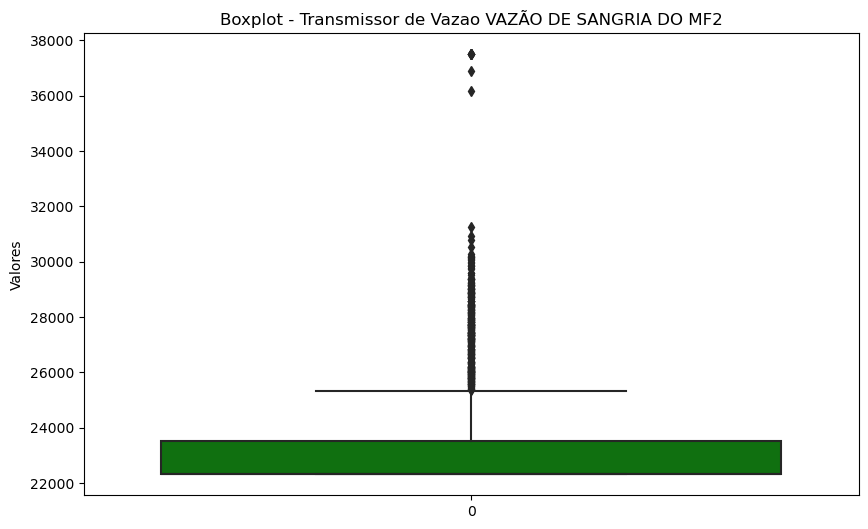

In [49]:


# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df1['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()



In [50]:
df1.describe()

,TimeStamp,Transmissor de Vazao MF-02,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2
count,2691,2691.000000,2691.000000,2691.000000
mean,2024-07-18 04:26:00,5113.150230,23337.368068,152.107952
min,2024-07-17 06:01:00,0.000000,22320.000000,50.000000
25%,2024-07-17 17:13:30,4626.235000,22320.000000,160.000000
50%,2024-07-18 04:26:00,5843.640000,22320.000000,170.000000
75%,2024-07-18 15:38:30,5899.335000,23531.600000,170.000000
max,2024-07-19 02:51:00,25822.270000,37500.000000,190.000000
std,NaN,3436.464427,1856.590610,35.300878


In [51]:
# Aplicar a condição na coluna "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'"
df1["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"] = df1["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"].apply(
    lambda x: 22320 if x < 22320 or x > 37500 else x
)




In [52]:
df1.describe()

,TimeStamp,Transmissor de Vazao MF-02,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2
count,2691,2691.000000,2691.000000,2691.000000
mean,2024-07-18 04:26:00,5113.150230,23337.368068,152.107952
min,2024-07-17 06:01:00,0.000000,22320.000000,50.000000
25%,2024-07-17 17:13:30,4626.235000,22320.000000,160.000000
50%,2024-07-18 04:26:00,5843.640000,22320.000000,170.000000
75%,2024-07-18 15:38:30,5899.335000,23531.600000,170.000000
max,2024-07-19 02:51:00,25822.270000,37500.000000,190.000000
std,NaN,3436.464427,1856.590610,35.300878


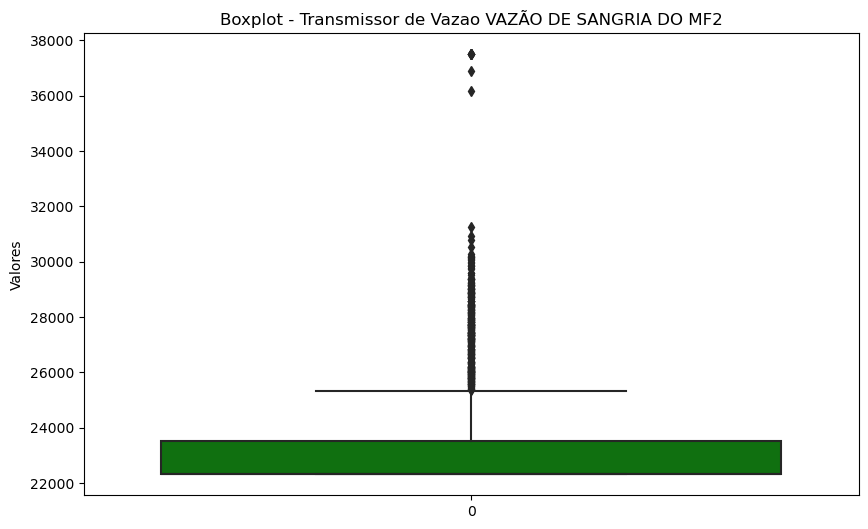

In [53]:


# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df1['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()


In [54]:
df1['TimeStamp'] = pd.to_datetime(df1['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-17 06:11:00', '2024-07-19 02:24:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe1 = []
for start, end in time_limits:
    mask = (df1['TimeStamp'] >= start) & (df1['TimeStamp'] <= end)
    df_temp = df1.loc[mask]
    dataframe1.append(df_temp)


In [55]:
MF1_final= pd.concat(dataframe1)

In [56]:
MF1_final.isna().sum()

TimeStamp                                         0
Transmissor de Vazao MF-02                        0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF2      0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2    0
dtype: int64

In [57]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF1_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] /= 1000


In [58]:
MF1_final['Produção de Creme'] = MF1_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] * MF1_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF1_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF1_final = MF1_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF1_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

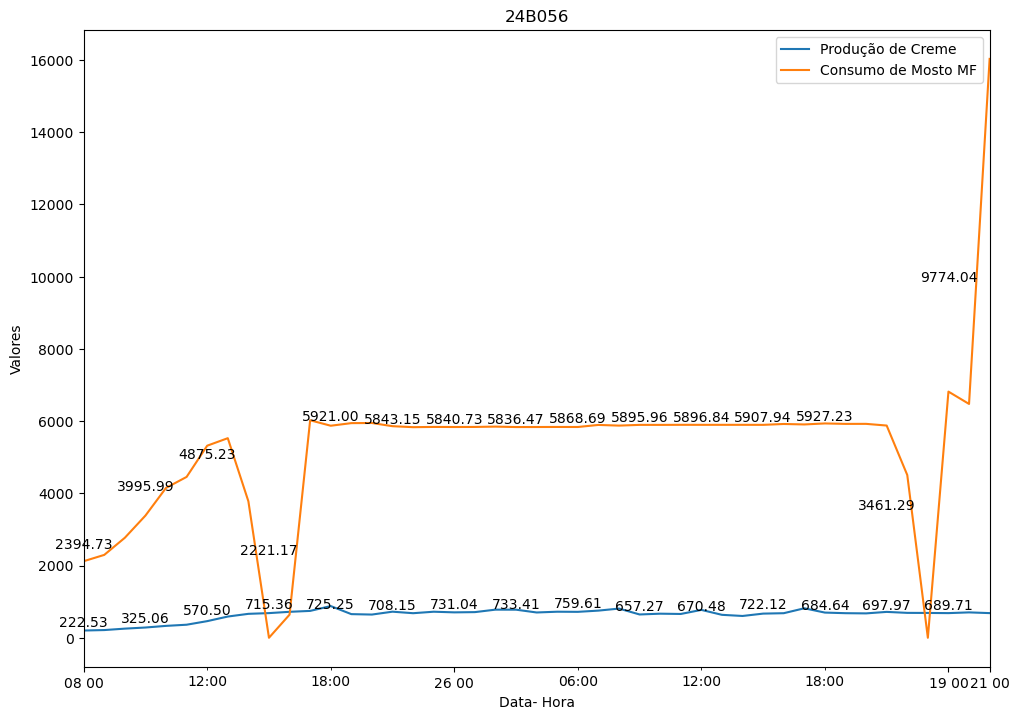

In [59]:

import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF1_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF1_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF1_final_3h = MF1_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF1_final_3h.index, MF1_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF1_final_3h.index, MF1_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24B056')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('output.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()


In [60]:
MF1_final["Produção de Creme"].sum()

28839.2765079

In [61]:
MF1_final["Consumo de Mosto MF"].sum()

238981.3652510204

## 24B057

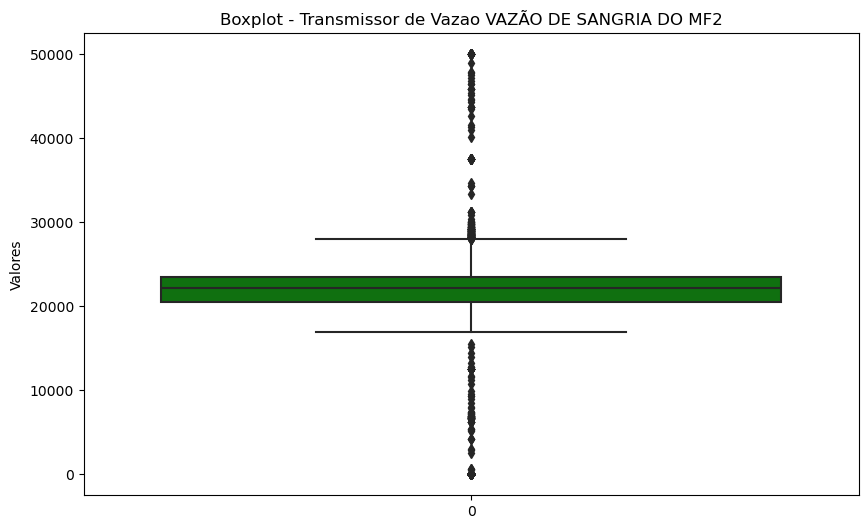

In [62]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df2['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()


In [63]:
df2.describe()

,Transmissor de Vazao MF-02,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2
count,2293.000000,2293.000000,2293.000000
mean,5399.963942,19651.515578,141.749529
std,1123.464105,10233.387316,41.265018
min,0.000000,0.000000,30.000000
25%,5733.190000,20455.080000,150.000000
50%,5870.530000,22141.800000,160.000000
75%,5899.220000,23454.690000,160.000000
max,13497.190000,50000.000000,170.000000


In [64]:
# Aplicar a condição na coluna "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'"
df2["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"] = df2["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"].apply(
    lambda x: 22141 if x < 22141 or x > 37500 else x
)


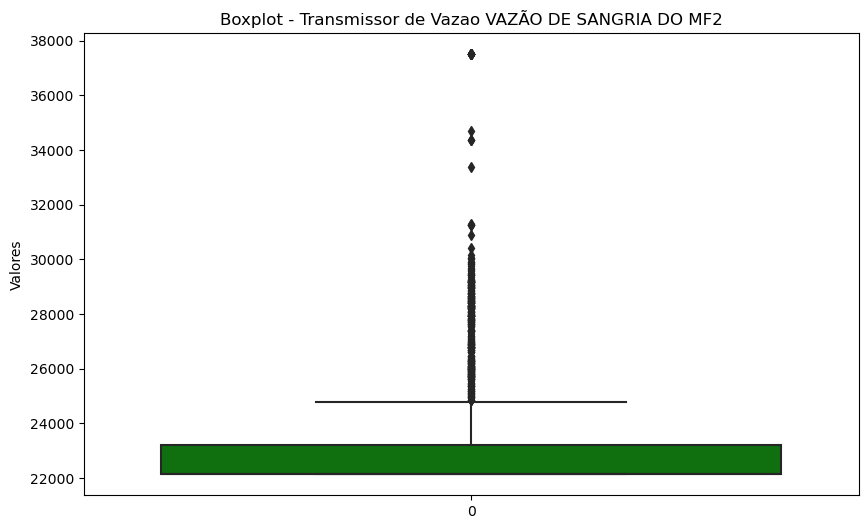

In [65]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df2['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()

In [66]:
df2.describe()

,Transmissor de Vazao MF-02,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2
count,2293.000000,2293.000000,2293.000000
mean,5399.963942,23307.451609,141.749529
std,1123.464105,2363.515589,41.265018
min,0.000000,22141.000000,30.000000
25%,5733.190000,22141.000000,150.000000
50%,5870.530000,22141.000000,160.000000
75%,5899.220000,23220.550000,160.000000
max,13497.190000,37500.000000,170.000000


In [67]:
df2['TimeStamp'] = pd.to_datetime(df2['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-19 15:17:00', '2024-07-21 05:29:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe2 = []
for start, end in time_limits:
    mask = (df2['TimeStamp'] >= start) & (df2['TimeStamp'] <= end)
    df_temp = df2.loc[mask]
    dataframe2.append(df_temp)


In [68]:
MF2_final= pd.concat(dataframe2)

In [69]:
MF2_final.isna().sum()

TimeStamp                                         0
Transmissor de Vazao MF-02                        0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF2      0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2    0
dtype: int64

In [70]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF2_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] /= 1000


In [71]:
MF2_final['Produção de Creme'] = MF2_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] * MF2_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF2_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF2_final = MF2_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF2_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

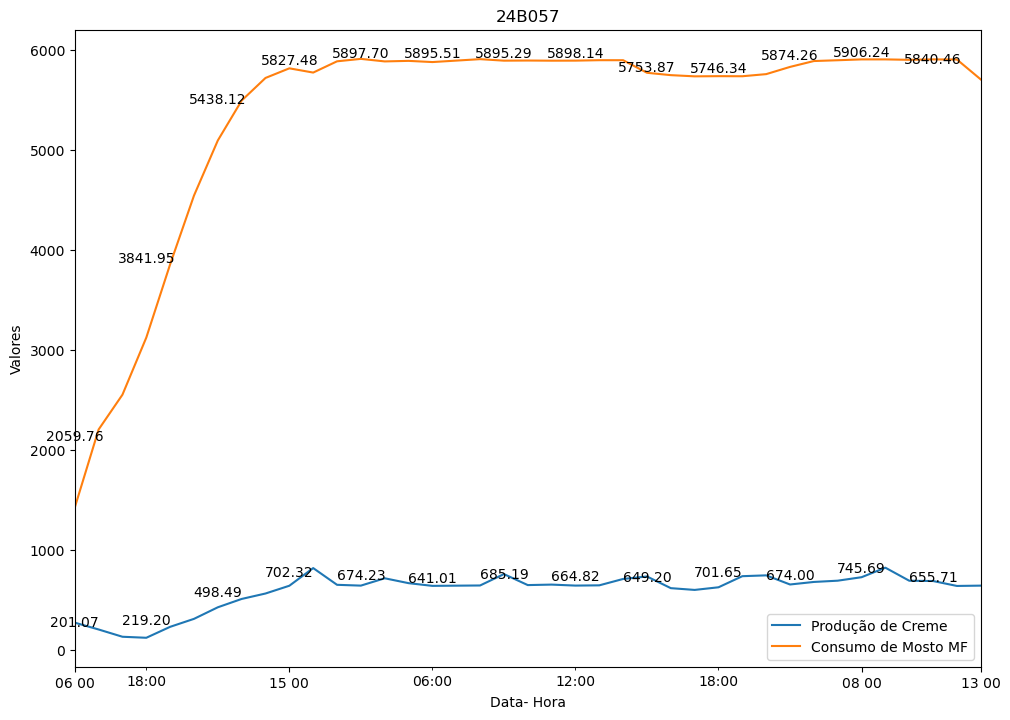

In [72]:

import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF2_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF2_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF2_final_3h = MF2_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF2_final_3h.index, MF2_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF2_final_3h.index, MF2_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24B057')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24B057.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [73]:
MF2_final["Produção de Creme"].sum()

23137.767054189073

In [74]:
MF2_final["Consumo de Mosto MF"].sum()

209625.38603488373

## 24B058

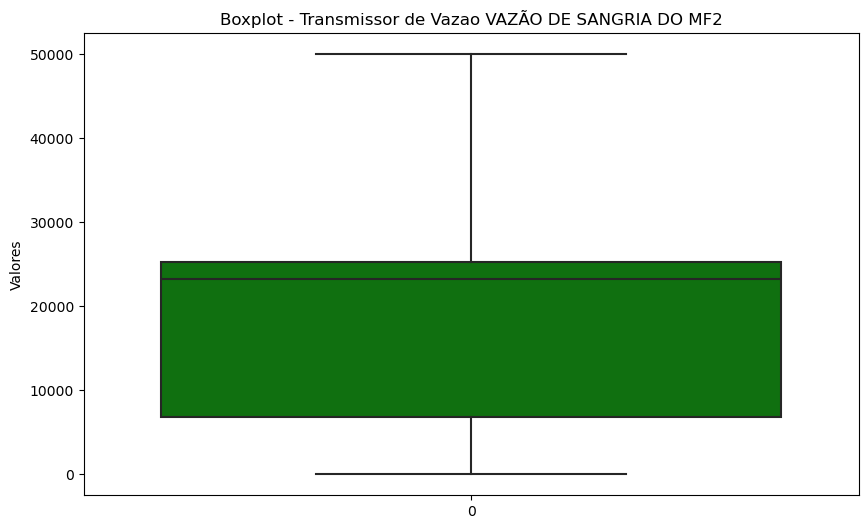

In [75]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df3['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()


In [76]:
df3.describe()

,Transmissor de Vazao MF-02,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2
count,2391.000000,2391.000000,2391.000000
mean,5267.329214,18246.068114,150.311585
std,1576.253615,10880.505412,37.771848
min,0.000000,0.000000,45.000000
25%,5739.185000,6828.815000,160.000000
50%,5865.840000,23239.270000,160.000000
75%,5963.225000,25254.435000,170.000000
max,23783.280000,50000.000000,180.000000


In [77]:
# Aplicar a condição na coluna "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'"
df3["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"] = df3["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"].apply(
    lambda x: 23239 if x < 23239 or x > 37500 else x
)

In [78]:
df3.describe()

,Transmissor de Vazao MF-02,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2
count,2391.000000,2391.000000,2391.000000
mean,5267.329214,24520.753095,150.311585
std,1576.253615,2081.570041,37.771848
min,0.000000,23239.000000,45.000000
25%,5739.185000,23239.000000,160.000000
50%,5865.840000,23239.000000,160.000000
75%,5963.225000,25242.720000,170.000000
max,23783.280000,37378.520000,180.000000


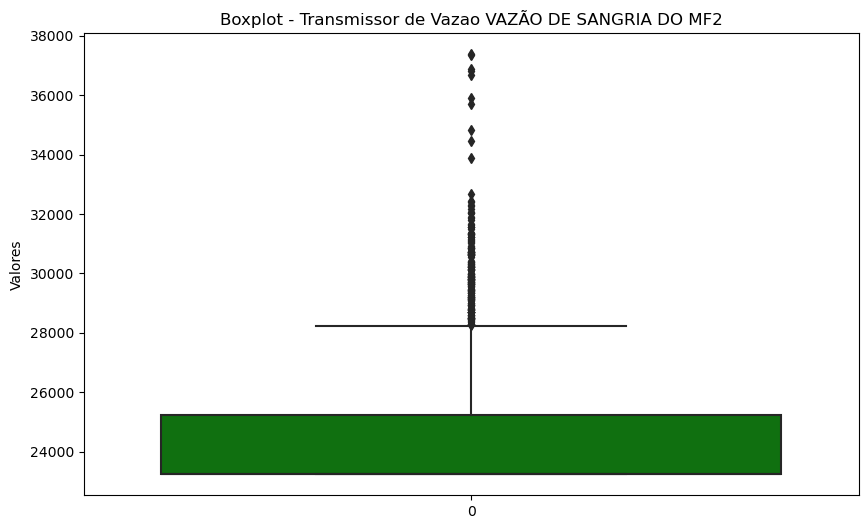

In [79]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df3['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()


In [80]:
df3['TimeStamp'] = pd.to_datetime(df3['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-21 13:50:00', '2024-07-23 05:01:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe3 = []
for start, end in time_limits:
    mask = (df3['TimeStamp'] >= start) & (df3['TimeStamp'] <= end)
    df_temp = df3.loc[mask]
    dataframe3.append(df_temp)

In [81]:
MF3_final= pd.concat(dataframe3)

In [82]:
MF3_final.isna().sum()

TimeStamp                                         0
Transmissor de Vazao MF-02                        0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF2      0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2    0
dtype: int64

In [83]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF3_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] /= 1000


In [84]:
MF3_final['Produção de Creme'] = MF3_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] * MF3_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF3_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF3_final = MF3_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF3_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

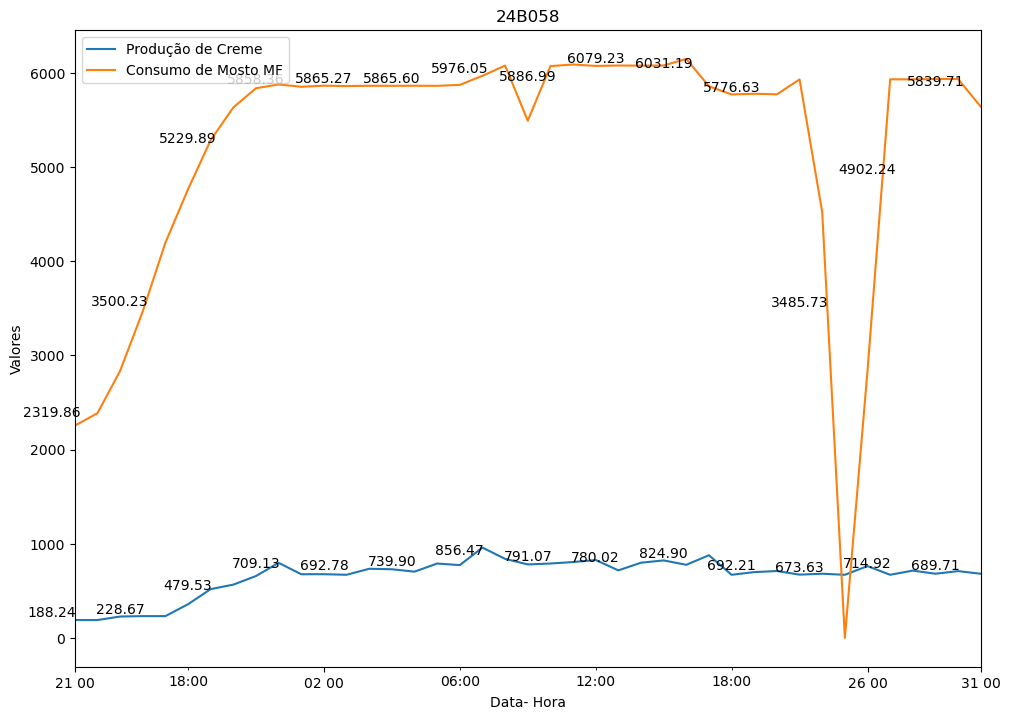

In [85]:

import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF3_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF3_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF3_final_3h = MF3_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF3_final_3h.index, MF3_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF3_final_3h.index, MF3_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24B058')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24B058.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [86]:
MF3_final["Produção de Creme"].sum()

26995.355184450003

In [87]:
MF3_final["Consumo de Mosto MF"].sum()

215531.08016666665

In [88]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16397 entries, 0 to 16396
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   TimeStamp                                       16397 non-null  object 
 1   Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3  16397 non-null  float64
 2   Transmissor de Vazao VAZÃO DE SANGRIA DO MF3    16397 non-null  float64
 3   Transmissor de Vazao MF-03                      16397 non-null  float64
dtypes: float64(3), object(1)
memory usage: 512.5+ KB


## 24B059

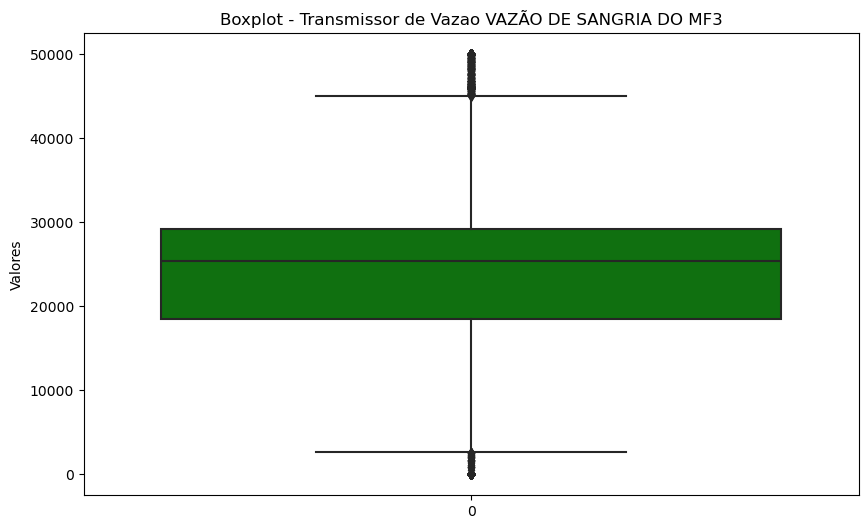

In [89]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df4['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF3')
plt.ylabel('Valores')
plt.show()


In [90]:
df4.describe()

,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3,Transmissor de Vazao VAZÃO DE SANGRIA DO MF3,Transmissor de Vazao MF-03
count,16397.000000,16397.000000,16397.000000
mean,155.924941,21877.363406,5357.487963
std,30.271689,12568.752067,3768.946308
min,60.000000,0.000000,0.000000
25%,150.000000,18530.860000,4924.450000
50%,165.000000,25357.420000,5892.160000
75%,170.000000,29154.300000,6215.480000
max,250.000000,50000.000000,26433.520000


In [91]:
# Aplicar a condição na coluna "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'"
df4["Transmissor de Vazao VAZÃO DE SANGRIA DO MF3"] = df4["Transmissor de Vazao VAZÃO DE SANGRIA DO MF3"].apply(
    lambda x: 25357 if x < 25357 or x > 37500 else x
)

In [92]:
df4.describe()

,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3,Transmissor de Vazao VAZÃO DE SANGRIA DO MF3,Transmissor de Vazao MF-03
count,16397.000000,16397.000000,16397.000000
mean,155.924941,27091.532281,5357.487963
std,30.271689,2679.282521,3768.946308
min,60.000000,25357.000000,0.000000
25%,150.000000,25357.000000,4924.450000
50%,165.000000,25357.000000,5892.160000
75%,170.000000,28259.380000,6215.480000
max,250.000000,37500.000000,26433.520000


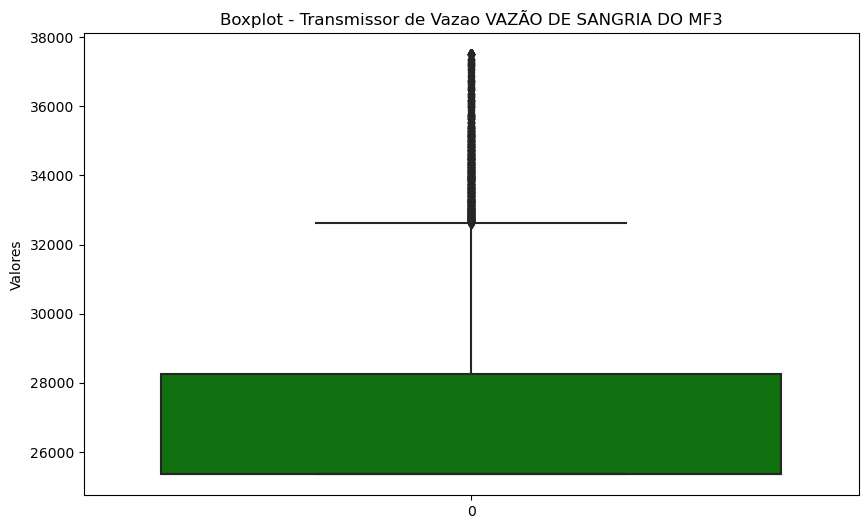

In [93]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df4['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF3')
plt.ylabel('Valores')
plt.show()


In [94]:
df4['TimeStamp'] = pd.to_datetime(df4['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-23 21:10:00', '2024-07-25 18:43:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe4 = []
for start, end in time_limits:
    mask = (df4['TimeStamp'] >= start) & (df4['TimeStamp'] <= end)
    df_temp = df4.loc[mask]
    dataframe4.append(df_temp)

In [95]:
MF4_final= pd.concat(dataframe4)

In [96]:
MF4_final.isna().sum()

TimeStamp                                         0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3    0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF3      0
Transmissor de Vazao MF-03                        0
dtype: int64

In [97]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF4_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3'] /= 1000

In [98]:
MF4_final['Produção de Creme'] = MF4_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3'] * MF4_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF4_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF4_final = MF4_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF4_final.rename(columns={'Transmissor de Vazao MF-03': 'Consumo de Mosto MF'}, inplace=True)

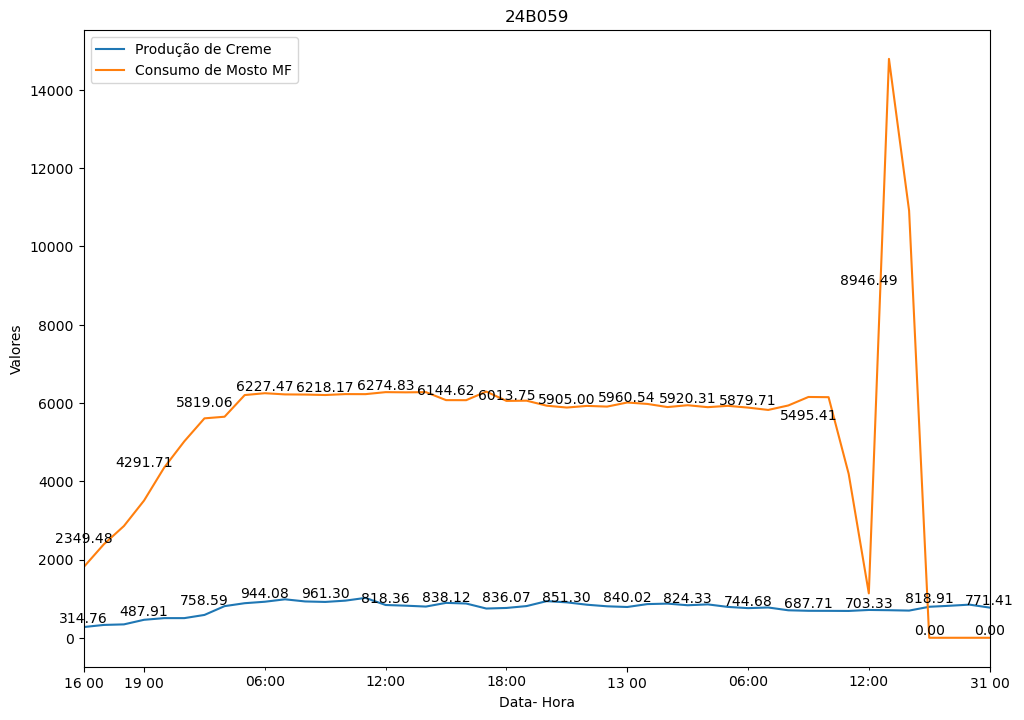

In [99]:

import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF4_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF4_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF4_final_3h = MF4_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF4_final_3h.index, MF4_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF4_final_3h.index, MF4_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24B059')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24B059.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [100]:
MF4_final["Produção de Creme"].sum()

35059.85893909913

In [101]:
MF4_final["Consumo de Mosto MF"].sum()

244339.62663738738

## 24B060

In [102]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12569 entries, 0 to 12568
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   TimeStamp                                       12569 non-null  object 
 1   Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2  12569 non-null  float64
 2   Transmissor de Vazao VAZÃO DE SANGRIA DO MF2    12569 non-null  float64
 3   Transmissor de Vazao MF-02                      12569 non-null  float64
dtypes: float64(3), object(1)
memory usage: 392.9+ KB


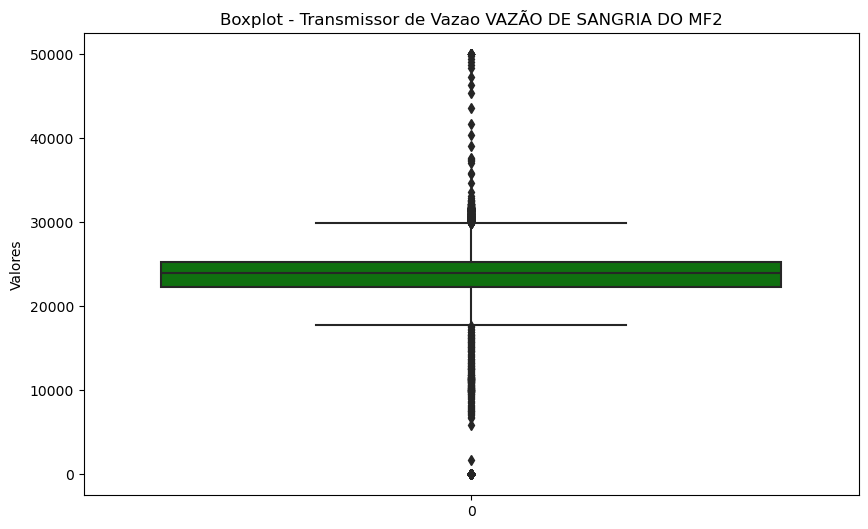

In [103]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df5['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()

In [104]:
df5.describe()

,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Transmissor de Vazao MF-02
count,12569.000000,12569.000000,12569.000000
mean,159.148460,20899.121609,6367.861835
std,24.172788,9237.659386,646.488915
min,50.000000,0.000000,0.000000
25%,160.000000,22241.870000,6336.020000
50%,170.000000,24005.160000,6534.610000
75%,170.000000,25308.780000,6675.660000
max,171.000000,50000.000000,24799.030000


In [105]:
# Aplicar a condição na coluna "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'"
df5["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"] = df5["Transmissor de Vazao VAZÃO DE SANGRIA DO MF2"].apply(
    lambda x: 24005 if x < 24005 or x > 37500 else x
)

In [106]:
df5.describe()

,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2,Transmissor de Vazao VAZÃO DE SANGRIA DO MF2,Transmissor de Vazao MF-02
count,12569.000000,12569.000000,12569.000000
mean,159.148460,25012.499620,6367.861835
std,24.172788,1738.607697,646.488915
min,50.000000,24005.000000,0.000000
25%,160.000000,24005.000000,6336.020000
50%,170.000000,24005.000000,6534.610000
75%,170.000000,25294.740000,6675.660000
max,171.000000,37500.000000,24799.030000


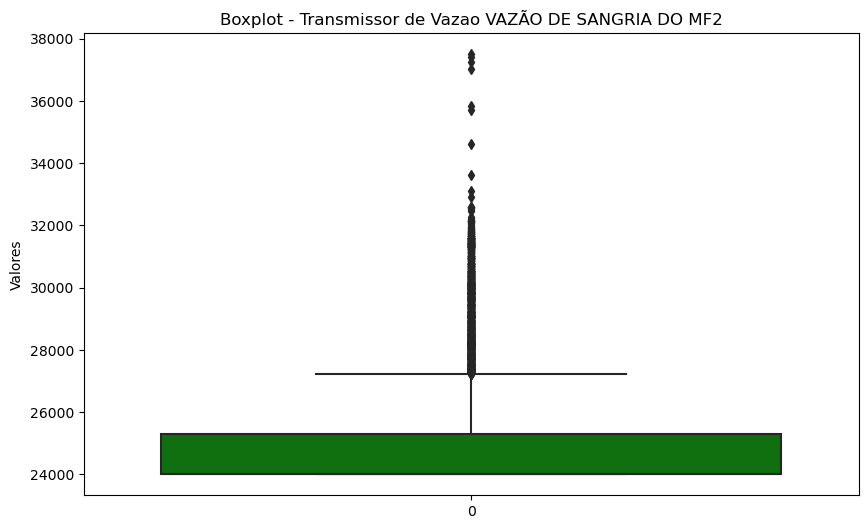

In [107]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df5['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF2')
plt.ylabel('Valores')
plt.show()


In [108]:
df5['TimeStamp'] = pd.to_datetime(df5['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-25 10:17:00', '2024-07-26 21:11:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe5 = []
for start, end in time_limits:
    mask = (df5['TimeStamp'] >= start) & (df5['TimeStamp'] <= end)
    df_temp = df5.loc[mask]
    dataframe5.append(df_temp)

In [109]:
MF5_final= pd.concat(dataframe5)

In [110]:
MF5_final.isna().sum()

TimeStamp                                         0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2    0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF2      0
Transmissor de Vazao MF-02                        0
dtype: int64

In [111]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF5_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] /= 1000

In [112]:
MF5_final['Produção de Creme'] = MF5_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF2'] * MF5_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF2']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF5_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF5_final = MF5_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF5_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

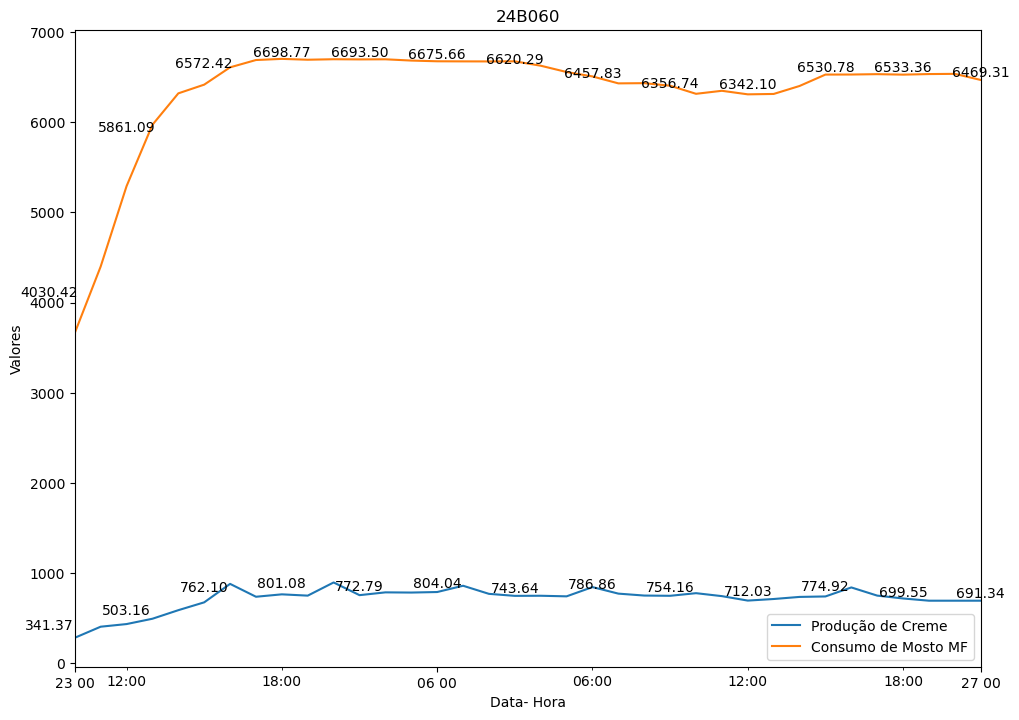

In [113]:
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF5_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF5_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF5_final_3h = MF5_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF5_final_3h.index, MF5_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF5_final_3h.index, MF5_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24B060')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24B060.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [114]:
MF5_final["Produção de Creme"].sum()

25717.12868518008

In [115]:
MF5_final["Consumo de Mosto MF"].sum()

228557.77991851367

## 24B061


In [116]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16913 entries, 0 to 16912
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   TimeStamp                                       16913 non-null  object 
 1   Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4  16913 non-null  float64
 2   Transmissor de Vazao VAZÃO DE SANGRIA DO MF4    16913 non-null  float64
 3   Transmissor de Vazao MF-04                      16913 non-null  float64
dtypes: float64(3), object(1)
memory usage: 528.7+ KB


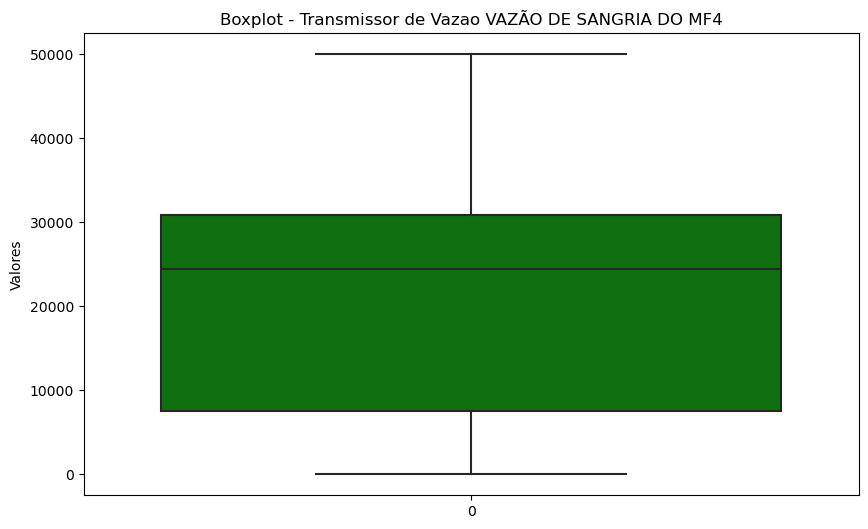

In [117]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df6['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF4')
plt.ylabel('Valores')
plt.show()

In [118]:
df6.describe()

,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4,Transmissor de Vazao VAZÃO DE SANGRIA DO MF4,Transmissor de Vazao MF-04
count,16913.000000,16913.000000,16913.000000
mean,150.600118,21423.888166,5124.257874
std,34.192583,14769.348584,3685.497897
min,30.000000,0.000000,0.000000
25%,150.000000,7485.550000,3736.090000
50%,160.000000,24455.860000,4966.080000
75%,170.000000,30908.300000,6536.020000
max,180.000000,50000.000000,28207.170000


In [119]:
# Aplicar a condição na coluna "Transmissor de Vazao VAZÃO DE SANGRIA DO MF2'"
df6["Transmissor de Vazao VAZÃO DE SANGRIA DO MF4"] = df6["Transmissor de Vazao VAZÃO DE SANGRIA DO MF4"].apply(
    lambda x: 24455 if x < 24455 or x > 37500 else x
)

In [120]:
df6.describe()

,Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4,Transmissor de Vazao VAZÃO DE SANGRIA DO MF4,Transmissor de Vazao MF-04
count,16913.000000,16913.000000,16913.000000
mean,150.600118,26247.743063,5124.257874
std,34.192583,3112.662983,3685.497897
min,30.000000,24455.000000,0.000000
25%,150.000000,24455.000000,3736.090000
50%,160.000000,24455.000000,4966.080000
75%,170.000000,26803.420000,6536.020000
max,180.000000,37500.000000,28207.170000


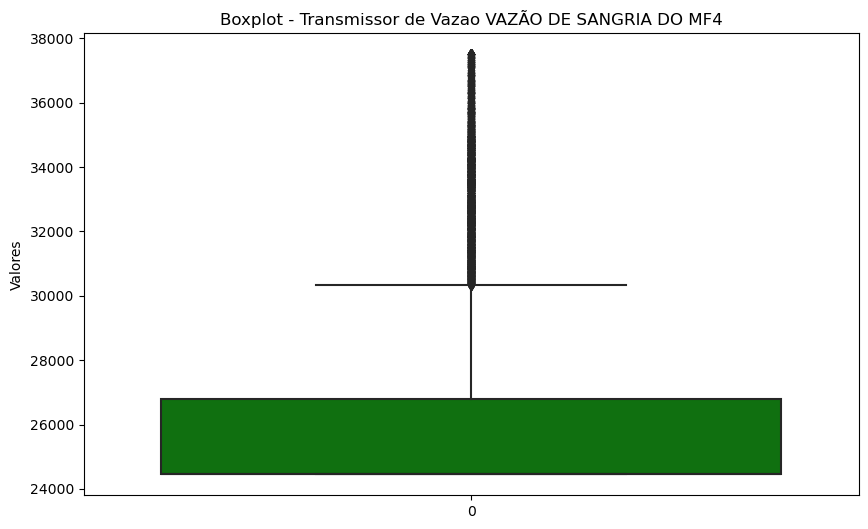

In [121]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df6['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF4')
plt.ylabel('Valores')
plt.show()

In [122]:
df6['TimeStamp'] = pd.to_datetime(df6['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-26 16:55:00', '2024-07-28 15:54:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe6 = []
for start, end in time_limits:
    mask = (df6['TimeStamp'] >= start) & (df6['TimeStamp'] <= end)
    df_temp = df6.loc[mask]
    dataframe6.append(df_temp)

In [123]:
MF6_final= pd.concat(dataframe6)

In [124]:
MF6_final.isna().sum()

TimeStamp                                         0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4    0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF4      0
Transmissor de Vazao MF-04                        0
dtype: int64

In [125]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF6_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4'] /= 1000

In [126]:
MF6_final['Produção de Creme'] = MF6_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4'] * MF6_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF6_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF6_final = MF6_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF6_final.rename(columns={'Transmissor de Vazao MF-04': 'Consumo de Mosto MF'}, inplace=True)

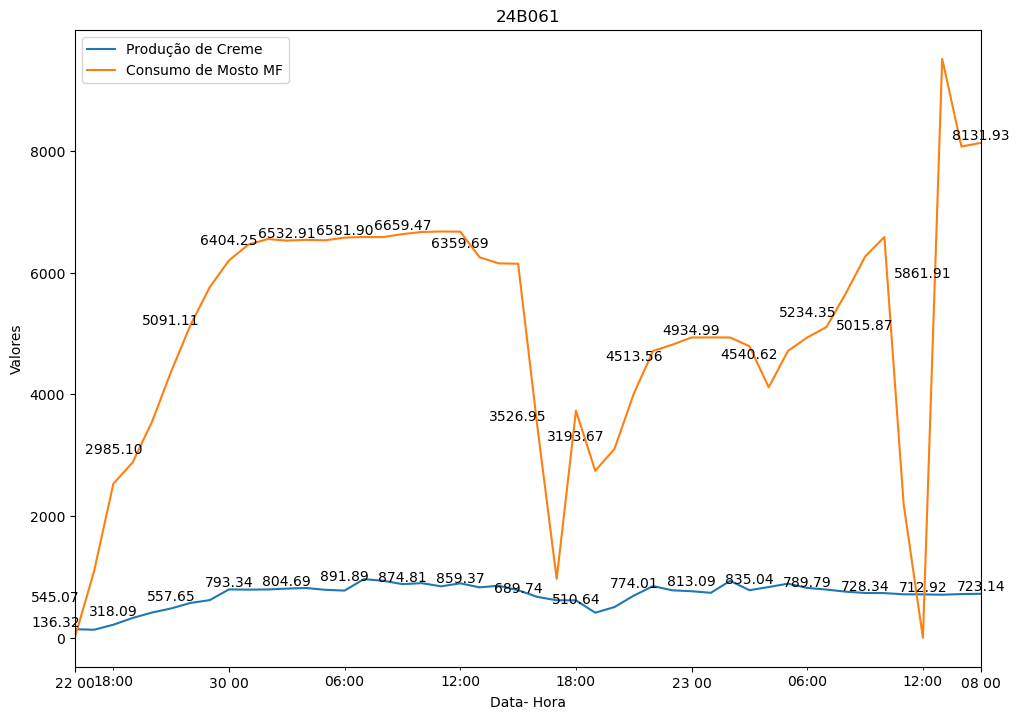

In [127]:
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

# Modificando a Fig para que ela saia na horizontal no pdf
fig, ax = plt.subplots(figsize=(11.69,8.27))  

# Plot 'Produção de Creme' e 'Consumo de Mosto MF'
MF6_final['Produção de Creme'].plot(ax=ax, label='Produção de Creme')
MF6_final['Consumo de Mosto MF'].plot(ax=ax, label='Consumo de Mosto MF')

# A amostra do rotulo de dados a cada 3H
MF6_final_3h = MF6_final.resample('3H').mean()

# Adiciona o rotulo de dados para cada ponto
for x, y in zip(MF6_final_3h.index, MF6_final_3h['Produção de Creme']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')
for x, y in zip(MF6_final_3h.index, MF6_final_3h['Consumo de Mosto MF']):
    ax.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Nomezin
ax.set_title('24B061')
ax.set_xlabel('Data- Hora')
ax.set_ylabel('Valores')


ax.legend()


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))


pdf_pages = PdfPages('24B061.pdf')
pdf_pages.savefig(fig, bbox_inches='tight')
pdf_pages.close()

plt.show()

In [128]:
MF6_final["Produção de Creme"].sum()

33856.06244219924

In [129]:
MF5_final["Consumo de Mosto MF"].sum()

228557.77991851367

## 24B061 

In [130]:
df7=pd.read_csv("24B061.csv")

In [131]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4', 'Transmissor de Vazao MF-04',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df7[column] = df7[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

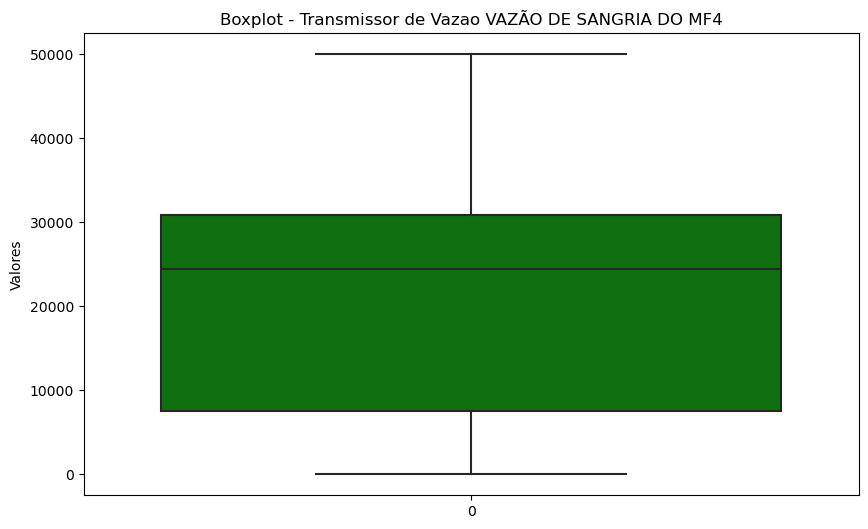

In [132]:
# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df7['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4'], color = "green")
plt.title('Boxplot - Transmissor de Vazao VAZÃO DE SANGRIA DO MF4')
plt.ylabel('Valores')
plt.show()

In [133]:
df7['TimeStamp'] = pd.to_datetime(df7['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-26 16:55:00', '2024-07-28 15:54:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe7 = []
for start, end in time_limits:
    mask = (df7['TimeStamp'] >= start) & (df7['TimeStamp'] <= end)
    df_temp = df7.loc[mask]
    dataframe7.append(df_temp)

In [134]:
MF7_final= pd.concat(dataframe7)

In [135]:
MF7_final.isna().sum()

TimeStamp                                         0
Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4    0
Transmissor de Vazao VAZÃO DE SANGRIA DO MF4      0
Transmissor de Vazao MF-04                        0
dtype: int64

In [136]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF7_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4'] /= 1000

In [137]:
MF7_final['Produção de Creme'] = MF7_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF4'] * MF7_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF4']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF7_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF7_final = MF7_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF7_final.rename(columns={'Transmissor de Vazao MF-04': 'Consumo de Mosto MF'}, inplace=True)

In [138]:
MF7_final["Produção de Creme"].sum()

28860.49814011297

## 24B059 


In [139]:
df8=pd.read_csv("24B059.csv")

In [140]:
# Lista de colunas para converter
columns_to_convert = ['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3', 'Transmissor de Vazao MF-03',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df8[column] = df8[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [141]:
df8['TimeStamp'] = pd.to_datetime(df8['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-23 21:10:00', '2024-07-25 18:43:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe8 = []
for start, end in time_limits:
    mask = (df8['TimeStamp'] >= start) & (df8['TimeStamp'] <= end)
    df_temp = df8.loc[mask]
    dataframe8.append(df_temp)

In [142]:
MF8_final= pd.concat(dataframe8)

In [143]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF8_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3'] /= 1000

In [144]:
MF8_final['Produção de Creme'] = MF8_final['Sp Parametro VALOR ATUAL CONCENTRACAO FERM MF3'] * MF8_final['Transmissor de Vazao VAZÃO DE SANGRIA DO MF3']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF8_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF8_final = MF8_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF8_final.rename(columns={'Transmissor de Vazao MF-03': 'Consumo de Mosto MF'}, inplace=True)

In [145]:
MF8_final["Produção de Creme"].sum()

29740.788421235775

In [146]:
MF8_final["Consumo de Mosto MF"].sum()

244339.62663738738

In [147]:
df9=pd.read_csv("24C263.csv")
df10=pd.read_csv("24C264.csv")
df11=pd.read_csv("24C265.csv")



In [148]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TimeStamp          3210 non-null   object 
 1   G100CPU_SET100426  3210 non-null   float64
 2   G100CP2_FT123205   3210 non-null   object 
 3   G100CP2_FT125004   3210 non-null   object 
dtypes: float64(1), object(3)
memory usage: 100.4+ KB


In [149]:
# Lista de colunas para converter
columns_to_convert = ['G100CP2_FT123105', 'G100CP2_FT125003',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df9[column] = df9[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [150]:
# Lista de colunas para converter
columns_to_convert = ['G100CP2_FT123105', 'G100CP2_FT125003',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df10[column] = df10[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [151]:
# Lista de colunas para converter
columns_to_convert = ['G100CP2_FT123205', 'G100CP2_FT125004',]

#Aqui vou remover a virgula que o PIMS tras para separação de milhar, e converter os dados para float64
for column in columns_to_convert:
    df11[column] = df11[column].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

In [152]:
print(df9['G100CP2_FT123105'].isnull().sum())
print(df10['G100CP2_FT123105'].isnull().sum())
print(df11['G100CP2_FT123205'].isnull().sum())


0
0
0


## 24C263


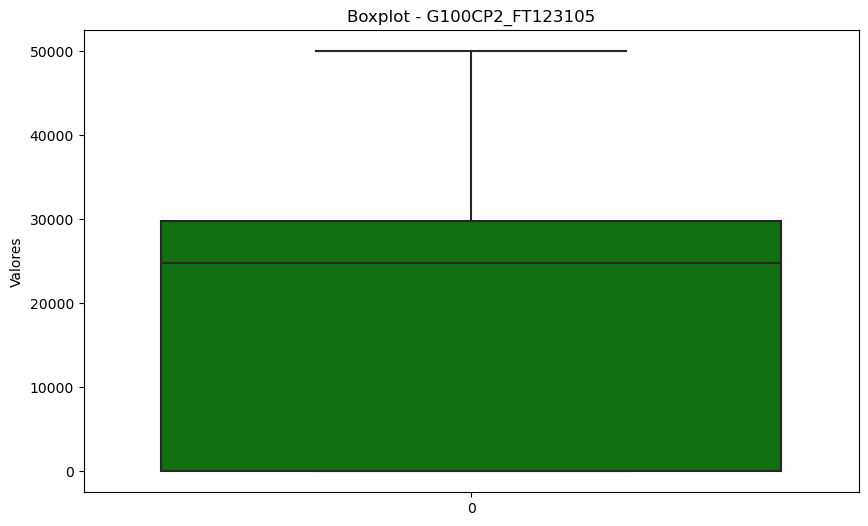

In [153]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df9['G100CP2_FT123105'], color = "green")
plt.title('Boxplot - G100CP2_FT123105')
plt.ylabel('Valores')
plt.show()



In [154]:
df9.describe()

,G100CPU_SET100424,G100CP2_FT123105,G100CP2_FT125003
count,2348.000000,2348.000000,2348.000000
mean,119.106474,19781.346597,3972.133820
std,63.115423,14185.596657,2072.811704
min,1.000000,0.000000,0.000000
25%,60.000000,0.000000,2275.685000
50%,160.000000,24847.655000,5132.565000
75%,170.000000,29839.845000,5312.640000
max,180.000000,50000.000000,24717.190000


In [155]:
df9['TimeStamp'] = pd.to_datetime(df9['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-24 06:57:00', '2024-07-25 22:04:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe9 = []
for start, end in time_limits:
    mask = (df9['TimeStamp'] >= start) & (df9['TimeStamp'] <= end)
    df_temp = df9.loc[mask]
    dataframe9.append(df_temp)


In [156]:
MF9_final= pd.concat(dataframe9)

In [157]:
MF9_final.isna().sum()

TimeStamp            0
G100CPU_SET100424    0
G100CP2_FT123105     0
G100CP2_FT125003     0
dtype: int64

In [158]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF9_final['G100CPU_SET100424'] /= 1000


In [159]:
MF9_final['Produção de Creme'] = MF9_final['G100CPU_SET100424'] * MF9_final['G100CP2_FT123105']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF9_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF9_final = MF9_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF9_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

In [160]:
MF9_final["Produção de Creme"].sum()

22577.56152762

In [161]:
MF9_final["G100CP2_FT125003"].sum()

155670.00716666668

## 24C264

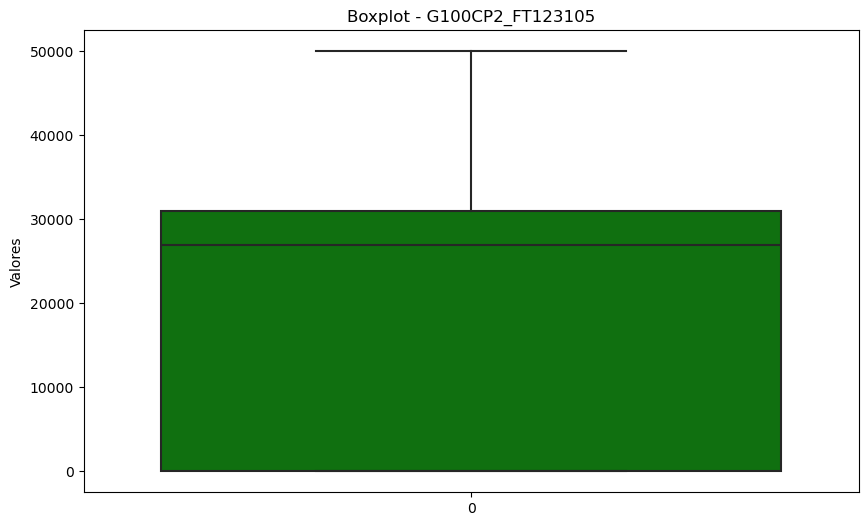

In [162]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df10['G100CP2_FT123105'], color = "green")
plt.title('Boxplot - G100CP2_FT123105')
plt.ylabel('Valores')
plt.show()

In [163]:
df10.describe()

,G100CPU_SET100424,G100CP2_FT123105,G100CP2_FT125003
count,3154.000000,3154.000000,3154.000000
mean,121.821179,20968.492720,4098.360013
std,66.523144,14225.341424,2166.481286
min,4.000000,0.000000,0.000000
25%,55.000000,0.000000,2136.950000
50%,168.000000,26905.465000,5263.310000
75%,170.000000,30990.230000,5403.332500
max,170.000000,50000.000000,24566.810000


In [164]:
df10['TimeStamp'] = pd.to_datetime(df10['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-26 12:46:00', '2024-07-28 17:19:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe10 = []
for start, end in time_limits:
    mask = (df10['TimeStamp'] >= start) & (df10['TimeStamp'] <= end)
    df_temp = df10.loc[mask]
    dataframe10.append(df_temp)


In [165]:
MF10_final= pd.concat(dataframe10)

In [166]:
MF10_final.isna().sum()

TimeStamp            0
G100CPU_SET100424    0
G100CP2_FT123105     0
G100CP2_FT125003     0
dtype: int64

In [167]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF10_final['G100CPU_SET100424'] /= 1000


In [168]:
MF10_final['Produção de Creme'] = MF10_final['G100CPU_SET100424'] * MF10_final['G100CP2_FT123105']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF10_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF10_final = MF10_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF10_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

In [169]:
MF10_final["Produção de Creme"].sum()

32907.137872290004

In [170]:
MF10_final["G100CP2_FT125003"].sum()

215927.49671428566

## 24C265

In [171]:
df11.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TimeStamp          3210 non-null   object 
 1   G100CPU_SET100426  3210 non-null   float64
 2   G100CP2_FT123205   3210 non-null   float64
 3   G100CP2_FT125004   3210 non-null   float64
dtypes: float64(3), object(1)
memory usage: 100.4+ KB


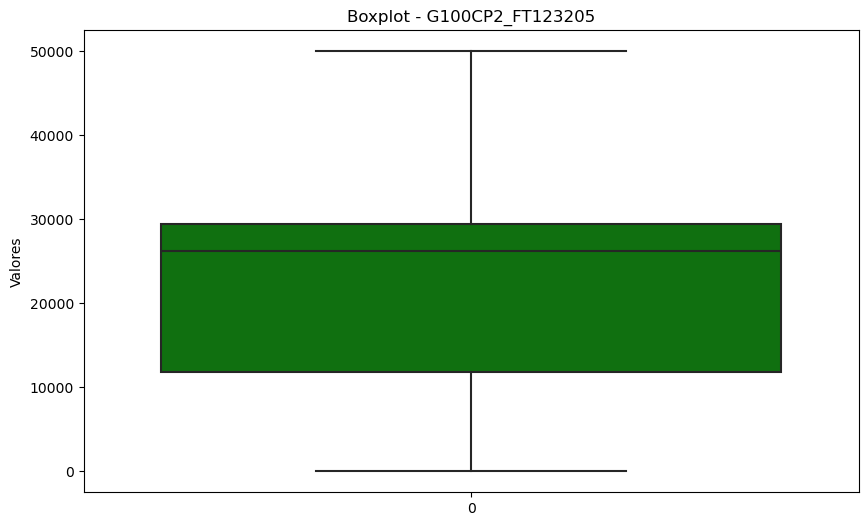

In [172]:

# Criar o boxplot para a variável no dataframe1
plt.figure(figsize=(10, 6))
sns.boxplot(df11['G100CP2_FT123205'], color = "green")
plt.title('Boxplot - G100CP2_FT123205')
plt.ylabel('Valores')
plt.show()

In [173]:
df11.describe()

,G100CPU_SET100426,G100CP2_FT123205,G100CP2_FT125004
count,3210.000000,3210.000000,3210.000000
mean,103.338732,23454.569165,4065.371000
std,68.242037,15698.169826,2144.288233
min,3.000000,0.000000,0.000000
25%,10.000000,11855.757500,1237.670000
50%,150.000000,26276.305000,5386.970000
75%,160.000000,29379.040000,5522.952500
max,170.000000,50000.000000,24603.750000


In [174]:
df11['TimeStamp'] = pd.to_datetime(df11['TimeStamp'])

# Definindo o limite de tempo de cada batelada VOU MATAR O RICARDO
time_limits = [
    ('2024-07-27 13:55:00', '2024-07-29 19:24:00'),
]

# Crie um DataFrame para cada conjunto de limites de tempo
dataframe11 = []
for start, end in time_limits:
    mask = (df11['TimeStamp'] >= start) & (df11['TimeStamp'] <= end)
    df_temp = df11.loc[mask]
    dataframe11.append(df_temp)


In [175]:
MF11_final= pd.concat(dataframe11)

In [176]:
MF11_final.isna().sum()

TimeStamp            0
G100CPU_SET100426    0
G100CP2_FT123205     0
G100CP2_FT125004     0
dtype: int64

In [177]:
# Divide a coluna 'Concentração MF1' por 10 e atualiza o DataFrame 'df_final'
MF11_final['G100CPU_SET100426'] /= 1000


In [178]:
MF11_final['Produção de Creme'] = MF11_final['G100CP2_FT123205'] * MF11_final['G100CPU_SET100426']*0.180

# Defina a coluna 'TimeStamp' como o índice
MF11_final.set_index('TimeStamp', inplace=True)

# Reamostra o DataFrame por hora, calcula a média de 'Mosto MF1' e 'Produção de Creme'
MF11_final = MF11_final.resample('H').mean()

# Renomeia a coluna 'Mosto MF1' para 'Consumo de Mosto MF'
MF11_final.rename(columns={'Transmissor de Vazao MF-02': 'Consumo de Mosto MF'}, inplace=True)

In [179]:
MF11_final["Produção de Creme"].sum()

25507.376298599997

In [180]:
MF11_final["G100CP2_FT125004"].sum()

221115.1235